In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import numpy as np

In [89]:
def get_data(root,ep):
    data={}
    for i in ep:
        data[i] = pd.json_normalize(requests.get(root + i, headers=headers).json())
        
    return data

In [90]:
d = get_data(root_url, ep)

In [91]:
mrg = d['events'].merge(d['reviews'], left_on='id', right_on='event_id', how='left').merge(d['tasters'], left_on='author_id', right_on='id', how='left')

In [92]:
mrg.drop(columns=['id_y','notifications_x','notifications_y','images','comment'],inplace=True)

In [93]:
mrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_x                    47 non-null     int64  
 1   place_id                47 non-null     object 
 2   title                   47 non-null     object 
 3   date                    47 non-null     object 
 4   type                    46 non-null     object 
 5   portion                 46 non-null     float64
 6   price                   43 non-null     float64
 7   event_rating            46 non-null     float64
 8   event_id                46 non-null     float64
 9   author_id               46 non-null     float64
 10  review_rating           46 non-null     float64
 11  place.parking           46 non-null     float64
 12  place.ambiance          46 non-null     float64
 13  place.service           45 non-null     float64
 14  place.wait_time         46 non-null     floa

In [94]:
mrg.drop(mrg[mrg.event_id.isnull()].index, inplace=True)

In [95]:
mrg[['event_id','author_id']] = mrg[['event_id','author_id']].astype(np.int64)
mrg['date'] = pd.to_datetime(mrg['date']).dt.normalize().copy()

In [96]:
mrg.head()

,id_x,place_id,title,date,type,portion,price,event_rating,event_id,author_id,...,sides.drink.price,sides.side.price,id,notifyMessages,notifyEvents,notifyReviews,name,password,photo,email
1,2879980822564788,2022027350403341249,Milestones,2022-08-05,Bar & Grill,9.0,NaN,4.574495,2879980822564788,1132445668569187,...,NaN,NaN,1.132446e+15,True,True,True,Mike,1d91fd39fcf425b9,http://gerdov.com/mike-db/api/wingsDB/mike-pho...,gerdov@gmail.com
2,2879980822564788,2022027350403341249,Milestones,2022-08-05,Bar & Grill,9.0,NaN,4.574495,2879980822564788,1132463937922427,...,NaN,NaN,1.132464e+15,NaN,NaN,NaN,Stephan,965f42f112d82297,http://gerdov.com/mike-db/api/wingsDB/stephan-...,stephan.reebs@umoncton.ca
3,2879980822564788,2022027350403341249,Milestones,2022-08-05,Bar & Grill,9.0,NaN,4.574495,2879980822564788,1132391362856516,...,NaN,NaN,1.132391e+15,True,True,True,Carlo,cacfc4814e28f6a0,http://gerdov.com/mike-db/api/wingsDB/carlo-ph...,cajmrn@gmail.com
4,778406151949610,1713123634208848,Five Bridges Bar & Grill,2022-07-08,resto pub and bar,16.0,28.0,3.632955,778406151949610,1132463937922427,...,NaN,NaN,1.132464e+15,NaN,NaN,NaN,Stephan,965f42f112d82297,http://gerdov.com/mike-db/api/wingsDB/stephan-...,stephan.reebs@umoncton.ca
5,778406151949610,1713123634208848,Five Bridges Bar & Grill,2022-07-08,resto pub and bar,16.0,28.0,3.632955,778406151949610,1132391362856516,...,NaN,NaN,1.132391e+15,True,True,True,Carlo,cacfc4814e28f6a0,http://gerdov.com/mike-db/api/wingsDB/carlo-ph...,cajmrn@gmail.com


# Best Wings

In [11]:
mrg.columns

Index(['id_x', 'place_id', 'title', 'date', 'type', 'portion', 'price',
       'event_rating', 'event_id', 'author_id', 'review_rating',
       'place.parking', 'place.ambiance', 'place.service', 'place.wait_time',
       'place.cleanliness', 'wings.moistness', 'wings.sauce', 'wings.taste',
       'wings.satiety', 'sides.appetizer.rating', 'sides.appetizer.name',
       'sides.side.rating', 'sides.side.name', 'sides.drink.rating',
       'sides.drink.name', 'sides.appetizer.price', 'sides.drink.price',
       'sides.side.price'],
      dtype='object')

In [12]:
wings = mrg[['id_x','title','date','author_id','review_rating','wings.moistness', 'wings.sauce', 'wings.taste','wings.satiety']].copy()

In [13]:
wings['wing_score'] = wings[['wings.moistness', 'wings.sauce', 'wings.taste','wings.satiety']].mean(axis=1)

In [14]:
wings.head()

,id_x,title,date,author_id,review_rating,wings.moistness,wings.sauce,wings.taste,wings.satiety,wing_score
1,2879980822564788,Milestones,2022-08-05,1132445668569187,4.541667,5.0,5.0,5.0,4.5,4.875
2,2879980822564788,Milestones,2022-08-05,1132463937922427,4.454545,4.5,4.5,4.5,4.5,4.500
3,2879980822564788,Milestones,2022-08-05,1132391362856516,4.727273,5.0,5.0,5.0,5.0,5.000
4,778406151949610,Five Bridges Bar & Grill,2022-07-08,1132463937922427,3.600000,4.0,4.0,4.5,4.0,4.125
5,778406151949610,Five Bridges Bar & Grill,2022-07-08,1132391362856516,4.208333,5.0,5.0,5.0,5.0,5.000


In [15]:
best_wings = wings.groupby('title')['wing_score'].mean()

In [16]:
best_wings.sort_values(ascending=False)

title
Irina's home made wings              4.916667
Milestones                           4.791667
St. Louis Bar & Grill Moncton        4.625000
Kelseys                              4.562500
The Old Triangle Irish Alehouse      4.500000
Five Bridges Bar & Grill             4.437500
Gahan House Hub City                 4.343750
Big League Burgers & Wings           4.093750
Red Satay Dieppe                     3.906250
Classic Burger                       3.875000
Baci Italia                          3.593750
Pump House - Brewpub & Restaurant    3.375000
Name: wing_score, dtype: float64

# Best Place Overall

In [17]:
place = mrg[['id_x','title','date','author_id','review_rating','place.parking', 'place.ambiance', 'place.service', 'place.wait_time','place.cleanliness']].copy()

In [18]:
place['place_score'] = place[['place.parking', 'place.ambiance', 'place.service', 'place.wait_time','place.cleanliness']].mean(axis=1)

In [19]:
place.groupby('title')['place_score'].mean().sort_values(ascending=False)

title
Baci Italia                          4.800000
Irina's home made wings              4.800000
Milestones                           4.433333
Kelseys                              4.350000
Red Satay Dieppe                     4.225000
Big League Burgers & Wings           4.200000
Classic Burger                       4.125000
St. Louis Bar & Grill Moncton        4.025000
The Old Triangle Irish Alehouse      3.825000
Five Bridges Bar & Grill             3.275000
Pump House - Brewpub & Restaurant    3.275000
Gahan House Hub City                 3.250000
Name: place_score, dtype: float64

# Best Ambiance

In [20]:
place.groupby('title')['place.ambiance'].mean().sort_values(ascending=False)

title
Irina's home made wings              5.000000
Milestones                           4.333333
The Old Triangle Irish Alehouse      4.250000
Kelseys                              4.125000
Baci Italia                          4.000000
Classic Burger                       4.000000
Red Satay Dieppe                     4.000000
Big League Burgers & Wings           3.875000
Gahan House Hub City                 3.500000
St. Louis Bar & Grill Moncton        3.250000
Pump House - Brewpub & Restaurant    3.125000
Five Bridges Bar & Grill             2.375000
Name: place.ambiance, dtype: float64

# Best Parking

In [21]:
place.groupby('title')['place.parking'].mean().sort_values(ascending=False)

title
Baci Italia                          5.000000
Kelseys                              4.875000
Milestones                           4.666667
Classic Burger                       4.625000
Big League Burgers & Wings           4.125000
Irina's home made wings              4.000000
Red Satay Dieppe                     4.000000
St. Louis Bar & Grill Moncton        3.500000
The Old Triangle Irish Alehouse      3.250000
Five Bridges Bar & Grill             2.000000
Pump House - Brewpub & Restaurant    1.875000
Gahan House Hub City                 0.625000
Name: place.parking, dtype: float64

# Best Service

In [22]:
place.groupby('title')['place.service'].mean().sort_values(ascending=False)

title
Baci Italia                          5.000000
Irina's home made wings              5.000000
Big League Burgers & Wings           4.625000
St. Louis Bar & Grill Moncton        4.625000
Red Satay Dieppe                     4.375000
Milestones                           4.333333
Gahan House Hub City                 4.125000
Kelseys                              4.000000
Five Bridges Bar & Grill             3.875000
Classic Burger                       3.750000
Pump House - Brewpub & Restaurant    3.625000
The Old Triangle Irish Alehouse      2.875000
Name: place.service, dtype: float64

# Most Expensive / Most Spent

In [23]:
prices = mrg[['id_x','title','date','author_id','price']].copy()

In [24]:
prices['price'].fillna(prices['price'].mean(),inplace=True)

In [25]:
prices.groupby('title')['price'].mean().sort_values(ascending=False)

title
Big League Burgers & Wings           50.000000
Red Satay Dieppe                     37.500000
Five Bridges Bar & Grill             28.000000
Kelseys                              27.470000
Milestones                           22.776744
St. Louis Bar & Grill Moncton        18.390000
Classic Burger                       18.000000
Gahan House Hub City                 17.000000
The Old Triangle Irish Alehouse      17.000000
Pump House - Brewpub & Restaurant    16.500000
Baci Italia                          14.990000
Irina's home made wings               0.000000
Name: price, dtype: float64

# Reviewers
## Most leanient

In [97]:
reviewers = mrg[['id_x','title','date','author_id','review_rating','event_rating','name']].copy()

Carlo on average gave the higest scores. 

In [100]:
reviewers.groupby('name')['review_rating'].mean()

name
Carlo      4.305745
Ian        3.922273
Mike       4.050568
Stephan    3.955408
Name: review_rating, dtype: float64

# Top 3 Restaurants by taster

In [107]:
reviewers.groupby(['title','name'])['review_rating'].mean().groupby('name').nlargest(3).reset_index(-1,drop=True)

name     title                        
Carlo    Irina's home made wings          5.000000
         Milestones                       4.727273
         St. Louis Bar & Grill Moncton    4.666667
Ian      Big League Burgers & Wings       4.333333
         Kelseys                          4.291667
         Baci Italia                      4.200000
Mike     Irina's home made wings          5.000000
         Milestones                       4.541667
         Kelseys                          4.208333
Stephan  Kelseys                          4.555556
         Irina's home made wings          4.500000
         Milestones                       4.454545
Name: review_rating, dtype: float64

# Trends

## review trend

<AxesSubplot:xlabel='review_rating', ylabel='Count'>

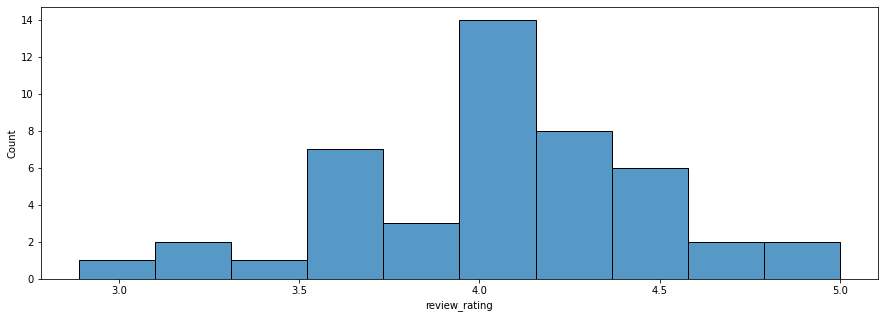

In [34]:
plt.figure(figsize=(15,5))
sns.histplot(reviewers,x='review_rating',bins=10)

In [35]:
events = mrg[['title', 'date', 'event_rating']].drop_duplicates()
events

,title,date,event_rating
1,Milestones,2022-08-05,4.574495
4,Five Bridges Bar & Grill,2022-07-08,3.632955
8,Big League Burgers & Wings,2022-06-10,4.104167
12,Classic Burger,2022-05-02,3.923611
16,The Old Triangle Irish Alehouse,2022-04-08,4.116477
20,Pump House - Brewpub & Restaurant,2022-03-08,3.392677
24,Red Satay Dieppe,2021-12-10,4.120896
28,Kelseys,2021-11-05,4.368056
32,Irina's home made wings,2021-09-25,4.833333
35,St. Louis Bar & Grill Moncton,2021-10-07,4.242424


In [36]:
from numpy import polyfit 
def fit(X, y, degree=3): 
	coef = polyfit(X, y, degree) 
	trendpoly = np.poly1d(coef) 
	return trendpoly(X) 

In [37]:
def get_trend(s, degree=3): 
	X = list(range(len(s))) 
	trend = fit(X, s.values, degree) 
	return pd.Series(data=trend, index=s.index)

In [38]:
events['trend'] =get_trend(events['event_rating'],4) 

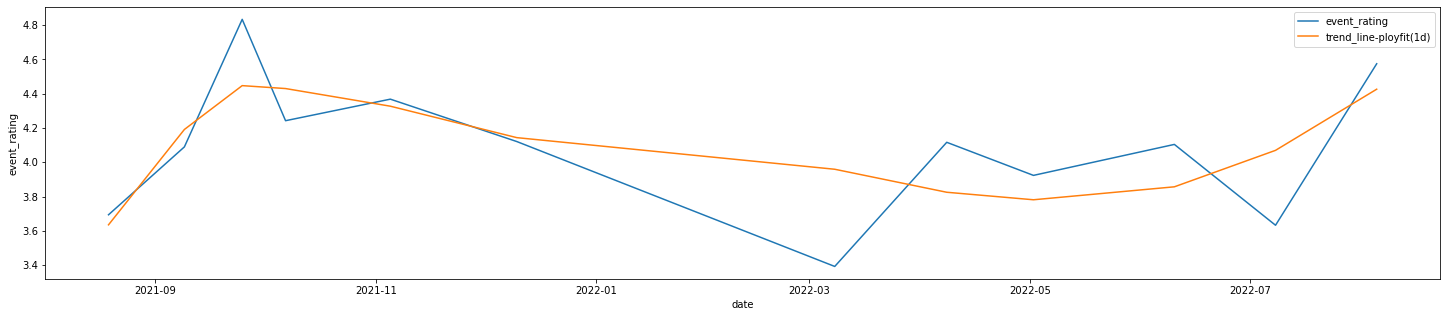

In [52]:
plt.figure(figsize=(25,5))
ax = sns.lineplot(data=events.sort_values('date'),x='date',y='event_rating',legend='brief',label='event_rating')
ax1 = sns.lineplot(data=events.sort_values('date'),x='date',y='trend',legend='brief',label='trend_line-ployfit(1d)')

## reviewer score trend

<AxesSubplot:xlabel='date', ylabel='review_rating'>

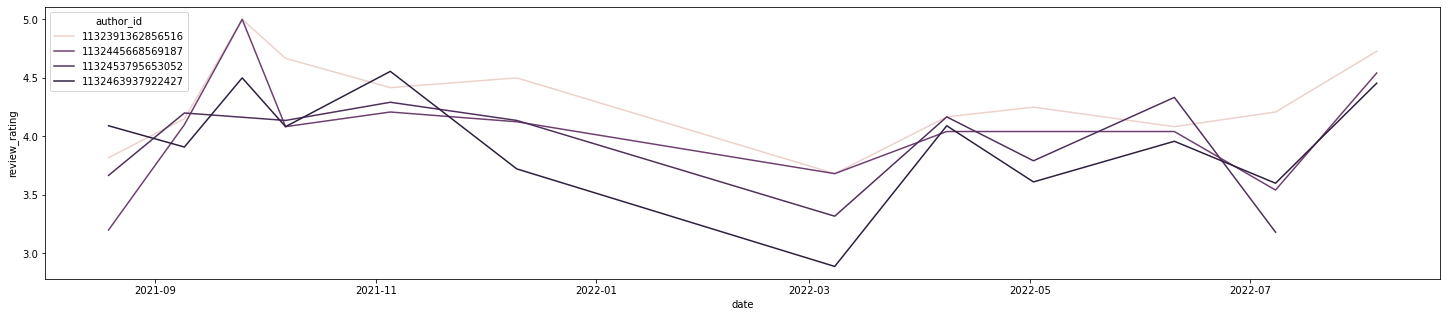

In [56]:
plt.figure(figsize=(25,5))
sns.lineplot(data=reviewers.sort_values('date'),x='date',y='review_rating',hue='author_id')

Looking at the overall spread over the course of our meetings.

<AxesSubplot:xlabel='title', ylabel='review_rating'>

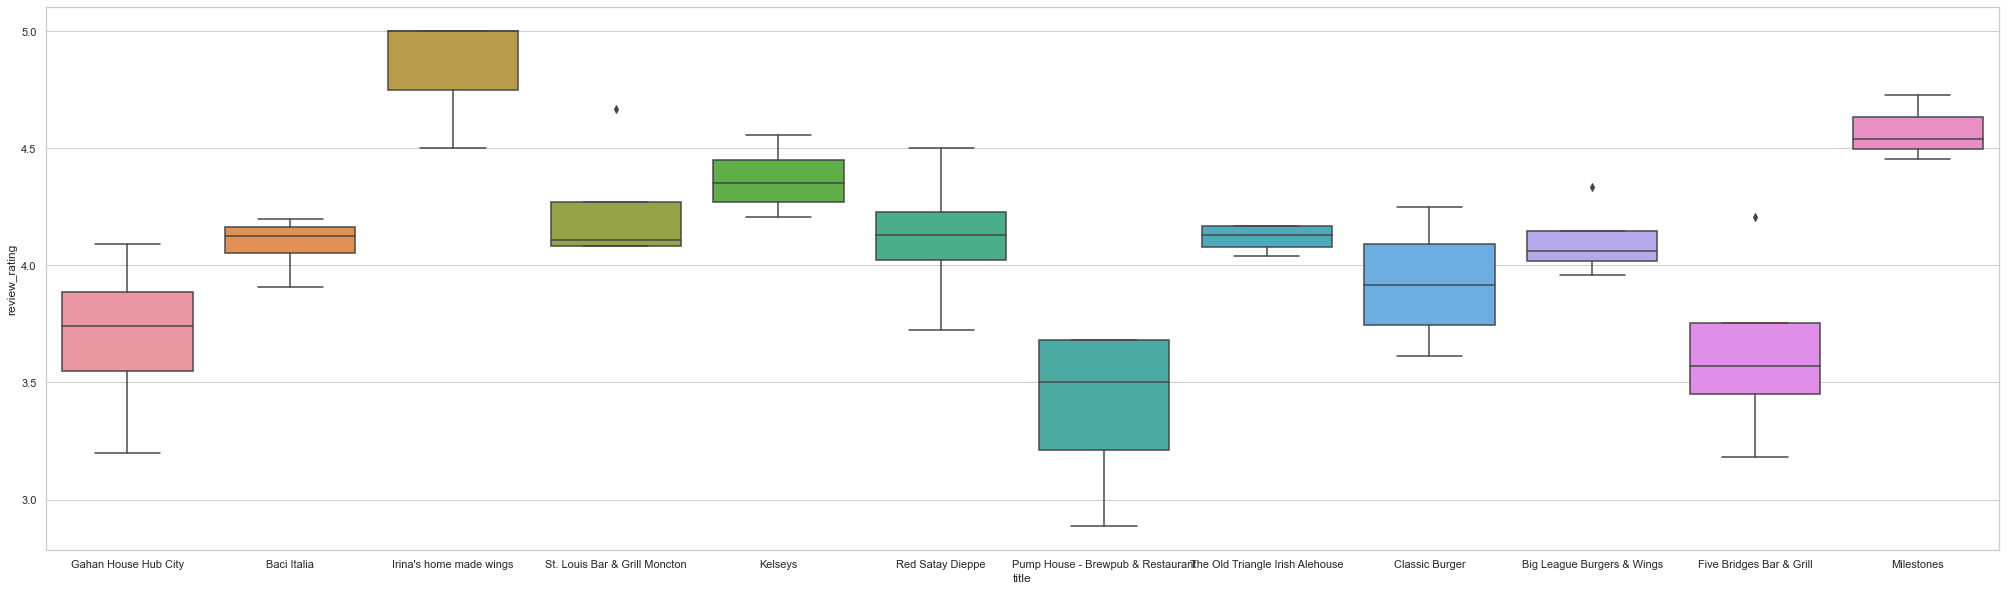

In [85]:
fig,ax = plt.subplots(figsize=(35,10))
sns.set_theme(style="whitegrid")
sns.boxplot(data=reviewers.sort_values('date'),x='title',y='review_rating', ax=ax)